## Capítulo 9 - Plotagem e Visualização

Gerar visualizações informativas é uma das tarefas mais importantes em análise de dados. Essa tarefa pode fazer parte do processo exploratório - por exemplo, para ajudar a identificar valores discrepantes (outliers) ou transformações necessárias nos dados, ou como uma forma de gerar ideias para modelos.Criar uma visualização interativa para a web talvez seja o objetivo final. Python tem muitas bibliotecas add-on para criar visualizações estáticas ou dinâmicas.

O matplotlib é um pacote de plotagem para desktop, projetada para criar plotagens com qualidade para publicação.

Com o passar do tempo, a matplotlib deu origem a uma série de kits de ferramentas add-on para visualização de dados que utilizam para a sua plotagem subjacente. Um deles é o seaborn (http://seaborn.pydata.org)

In [1]:
# Configuração interativa no Notebook Jupyter
#%matplotlib notebook
%matplotlib inline

### 9.1 Introdução rápida à API da matplotlib

Com a matplotlib, usamos a seguinte convenção de importação:

In [2]:
import matplotlib.pyplot as plt

###### Depois de executar '%matplotlib notebook' no Jupyter, podemos tentar a criação de uma plotagem simples.

In [3]:
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

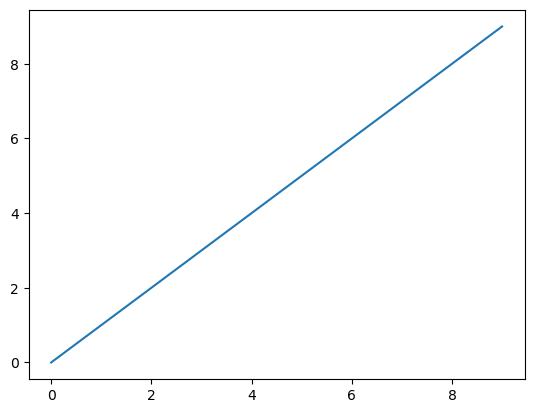

In [5]:
plt.plot(data)

#### Figuras e subplotagens 

As plotagens na matplotlib ficam em um objeto 'figure'. Podemos criar uma nova figura com 'plt.figure'.

In [6]:

fig = plt.figure()

<Figure size 640x480 with 0 Axes>

No IPython, uma janela de plotagem vazia aparecerá, mas no Jupyter, nada será exibido até que mais alguns comandos sejam usados. 'plt.figure' tem uma série de opções; em especial, figsize garantirá que a figura tenha determinado tamanho e uma razão de aspecto, se ela for salva em disco.

Não é possível criar uma plotagem com uma figura em branco. Deve criar uma ou mais 'subplots' usando 'add_subplots':

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

Essa instrução significa que a figura deve ser '2 x 2' (portanto até quatro plotagem no total), e estamos selecionando a primeira das quatro subplotagens (númeradas a partir de 1). Se criar as duas próximas subplotagens, acabará com uma visualização que tem o aspecto na figura abaixo:

In [8]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

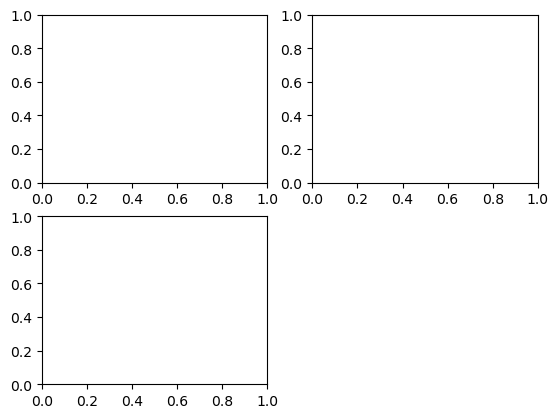

In [9]:
fig

###### NOTA: 
    
    No Notebook Jupyter é que as plotagens são reiniciadas após cada célula ter sido avaliada, portanto, para plotagens mais complexas, devemos colocar todos os comandos de plotagem em uma única célula do notebook

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Quando executamos um comando de plotagem como 'plt.plot([1.5, 3.5, -2, 1.6])', a matplotlib desenhará na última figura e subplotagem usadas (criando uma, se for necessário), ocultando, assim, a criação da figura e da subplotagens. Assim, se adicionarmos o comando a seguir, teremos algo semelhante a figura abaixo:

In [10]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')

O 'k--' é uma opção de estilo que instrui a matplotlib a plotar uma linha trecejada preta. Os objetos devolvidos por 'fig.add_subplot' nesse caso são objetos 'AxesSubplot'; pode plotar diretamente nas outras subplotagens vazias chamando o método de instância de cada uma.

In [11]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Poderá encontrar um catálogo completo dos tipos de plotagens na documentação da matplotlib(http://matplotlib.sourceforge.net/)

Criar uma figura com uma grade de subplotagens é uma tarefa bem comum, de modo que a matplotlib inclui um método conveniente, 'plt.subplots', que cria uma nova figura e devolve um array NumPy contendo os objetos de subplotagem criado:

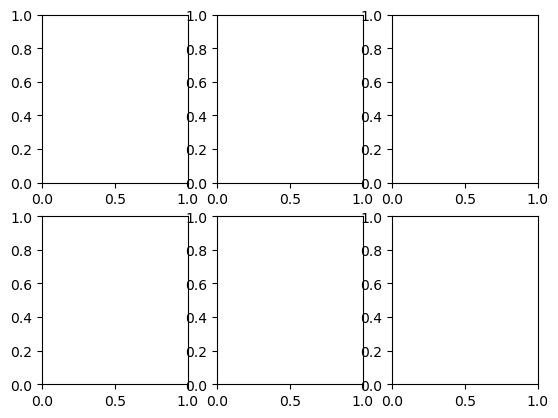

In [12]:
fig, axes = plt.subplots(2, 3)

In [13]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Isso é muito útil, pois o array 'axes' pode ser facilmente indexado como um array bidimensional; por exemplo, axes[0, 1]. Também podemos informar que as subplotagens devem ter os mesmos eixos x ou y usando sharex e sharey, respectivamente. Isso é particularmente conveniente se estivermos comparando dados na mesma escala; caso contrário, a matplotlib definirá automaticamente uma escala para os limites das plotagens de forma independente.

###### Tabela 9.1 - Opções de pyplot.subplots

Argumentos 

-> nrows => Número de linhas das subplotagens;

-> ncols => Número de colunas das subplotagens;

-> sharex => Todas as subplotagens devem usar os mesmos tiques no eixo x (Ajustar o xlim afetará todas as subplotagens);

-> sharey => Todas as subplotagens devem usar os mesmos tiques no eixo y (Ajustar o ylim afetará todas as subplotagens);

-> subplot_kw => Dicionário de argumentos nomeados passados para a chamada a 'add_subplot' para criar cada subplotagem;

-> fig_kw => Argumentos nomeados adicionais para subplots são usadas para criar a figura, por exemplo plt.subplots(2, 2, figsize=(6, 6));

#### Ajustando o espaçamento em torno das subplotagens

Por padrão, a matplotlib deixa determinado espaço para preenchimento em torno das subplotagens, além de um espaçamento entre elas. Todos esses espaçamentos são especificados em relação à altura e à largura da plotagem, de modo que, se redimensionar a plotagem, seja por meio de um programa ou manualmente usando a janela de GUI, ela se ajustará dinamicamente. O espaçamento pode ser alterado usando o método 'subplots_adjust' dos objetos 'figure', também disponível como uma função de nível superior:

In [14]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<Figure size 640x480 with 0 Axes>

'wspace' e 'hspace' controlam o preenchimento da largura e da altura da figura, respectivamente, a serem usados como espaçamento entre as subplotagens. Eis um pequeno exemplo em que reduzi o espaçamento totalmente para zero

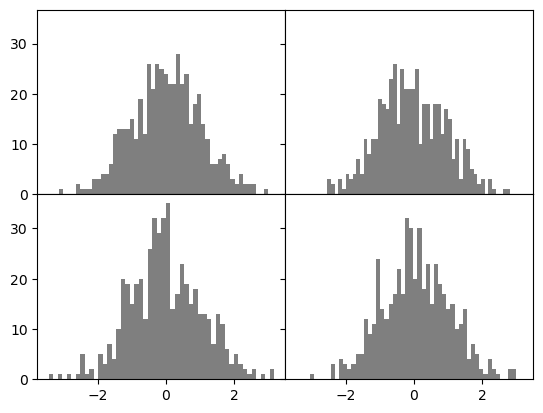

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

Talvez tenha notado que há sobreposição entre os rótulos dos eixos. A matplotlib não verifica se o rótulos se sobrepõe, portanto, em um caso como esse, será necessário corrigir os rótulos por conta própria especificando explicitamente os locais dos tiques e seus rótulos.

#### Cores, marcadores e estilos de linha

A função principal plot da matplotlib aceita arrays de coordenadas x e y e, opcionalmente, uma string abreviada informando a cor e o estilo da linha. Por exemplo, para plotar x versus y com traços verdes, executaríamos: 

ax.plot(x, y, 'g--')

Essa forma de especificar tanto a cor quanto o estilo da linha em uma string é oferecida como uma conveniência; na prática, se estiver criando plotagens com um programa, talvez prefira não ter que lidar com strings para criar plotagens com o estilo desejado. A mesma plotagem também poderia ter sido expressa de modo mais explícito, assim: 
    
    ax.plot(x, y, linestyle='--', color='g')

Há uma série de abreviaturas de cores, disponibilizada para cores comumente usadas, mas podemos utilizar qualquer cor do espectro especificando o seu código hexa (por exemplo, '#CECECE').

Plotagens de linha, além do mais, podem ter marcadores para destacar os pontos de dados propriamente ditos. Como o matplotlib cria uma plotagem de linha contínua, fazendo uma interpolação entre os pontos, ocasionalmente talvez não esteja claro onde estão os pontos. O marcador pode fazer parte da string de estilo, que deve conter a cor, seguida do tipo de marcador e do estilo da linha.

In [16]:
from numpy.random import randn

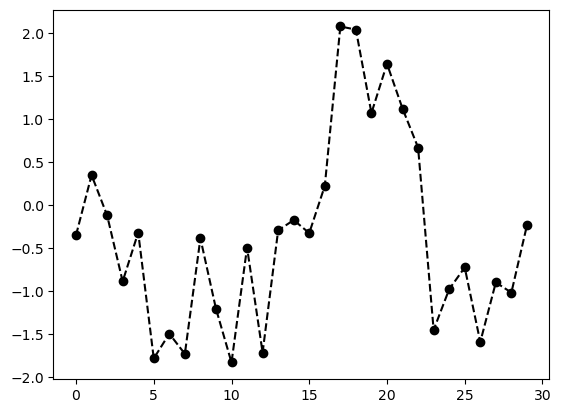

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(randn(30).cumsum(), 'ko--')

###### Esse código poderia ter sido escrito mais explicitamente, assim:

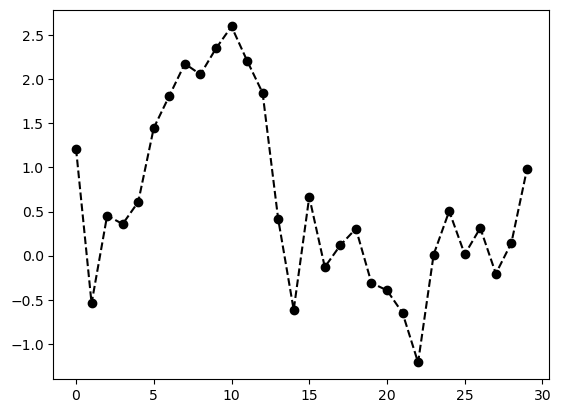

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

###### Para plotagem de linha, perceberá que pontos subsequentes, por padrão, são interpolados linearmente. Isso pode ser alterado com a opção 'drawstyle'

In [19]:
data = np.random.randn(30).cumsum()

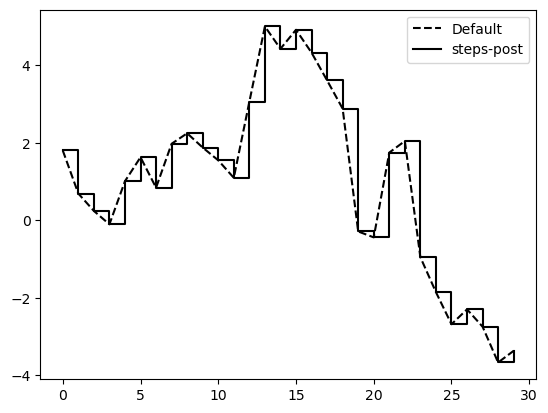

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### Tiques, rótulos e legendas

Para a maioria dos tipos de decoração das plotagens, há duas maneiras principais de proceder: usar a interface procedural pyplot (isto é, matplotlib.pyplot)ou a API nativa da matplotlib, mais orientada a objetos.

A interface pyplot, projetada para uso interativo, é constituída de métodos como 'xlim, xticks e xticklabels'. Eles controlam o intervalo de plotagem, as localizações dos tiques e seus rótulos, respectivamente. Podem ser usados de duas maneiras.

    -> Se forem chamados sem argumentos, devolvem o valor atual do parâmetro (por exemplo plt.xlim() devolve o intervalo atual de plotagem no eixo x).
    
    -> Se forem chamados com parâmetros, definem seus valores (por exemplo, plt.xlim([0, 10]) define o intervalo do eixo x como sendo de 0 a 10).
    
Todos esses métodos atuam no "AxesSubplot" ativo ou mais recentemente criado. Cada um deles corresponde a dois métodos no objeto de subplotagem; no caso de xlim, são ax.get_xlim e ax.set_xlim. 

#### Definindo o título, os rótulos dos eixos, os tiques e os rótulos dos tiques

Para demonstrar a personalização dos eixos, criaremos uma figura simples e plotaremos um passeio aleatório (random walk).

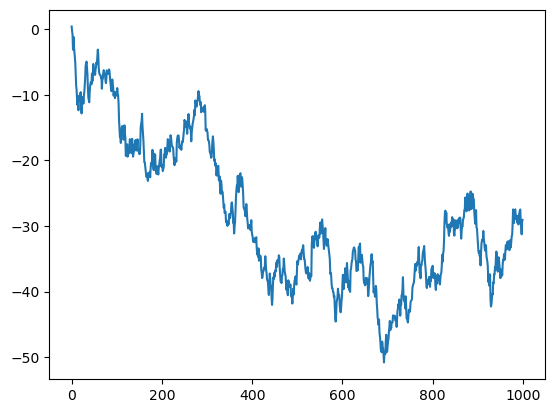

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Para alterar os tiques do eixo x, a opção mais simples é usar 'set_xticks' e 'set_xtickslabels'. A primeira instrui a matplotlib acerca do local para posicionar os tiques no intervalo de dados; por padrão, esses locais também serão os rótulos. No entanto, podemos definir qualquer outro valor como rótulos usando 'set_xtickslabels':

In [22]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

A opção 'rotation' define os rótulos dos tiques de x com uma rotação de 30 graus. Por fim, o xlabels dá um nome ao eixo x, enquanto o set_title define o título da subplotagens:

In [23]:
ax.set_title('Meu primeiro plot matplotlib')

Text(0.5, 1.0, 'Meu primeiro plot matplotlib')

In [24]:
ax.set_xlabel('Stages')

Text(0.5, 4.444444444444445, 'Stages')

In [25]:
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


#### Acrescentando legendas

As legendas são outro elemento crucial para identificar elementos da plotagem. 
Há duas maneiras de adicionar uma legenda. O modo mais simples é passar o argumento label ao adicionar cada parte da plotagem:

In [26]:
from numpy.random import randn

###### Depois de ter feito, chamar 'ag.legend()' ou 'plt.legend()' para criar automaticamente uma legenda. A plotagem resultante pode ser vista figura.

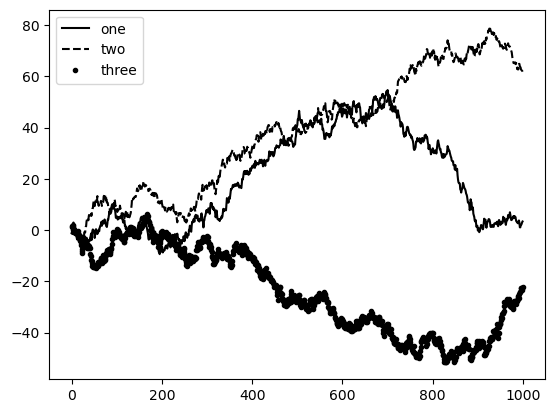

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend()

O método 'legend' tem várias outras opções para o argumento de localização 'loc.'

###### ax.legend?

#### Anotações e desenhos em uma subplotagem

Além dos tipos padrões de plotagem, talvez queira desenhar suas próprias anotações na plotagem, que poderiam ser compostas de textos, setas ou outras formas. É possível adicionar anotações e textos usando as funções 'text, arrow e annotate'. A função 'text' desenha um texto nas coordenadas especificadas (x, y) da plotagem, com uma estilização personalizada opcional:
    
    ax.text(x, y, 'Hello World!', 
           family='monospace', fontsize=10)
         
As anotações podem incluir tanto texto quanto setas, organizados de modo apropriado. 

Como exemplo, vamos plotar os preços de fechamento do índice S&P 500 a partir de 2007 (obtidos do Yahoo! Finance) e fazer anotações com algumas das datas importantes da crise financeira de 2008 a 2009. Pode reproduzir facilmente esse código de exemplo, em sua maior parte, em uma única célula de um notebook Jupyter.

In [28]:
from datetime import datetime
import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

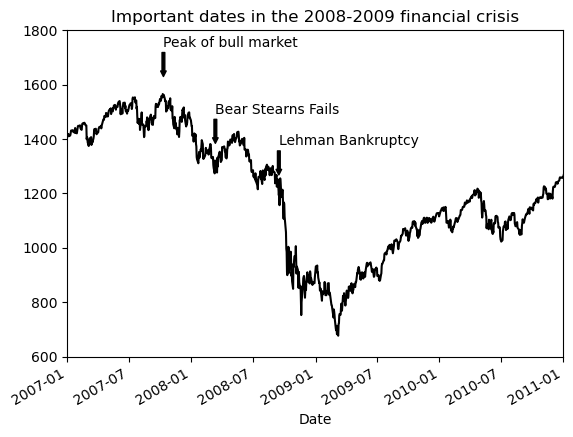

In [29]:

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

Há alguns pontos importantes a serem enfatizados nessa plotagem: o método 'ax.annotate' é capaz de desenhar rótulos nas coordenadas x e y indicadas. Usamos os métodos 'set_xlim' e 'set_ylim' para definir manualmente as fronteiras de início e de fim da plotagem, em vez de usar o default da matplotlib. Por fim 'ax.set_title' adiciona um título principal á plotagem.
    
Desenhar formas exige um pouco mais de cuidado. A matplotlib tem objetos que representam muitas formas comuns, conhecidas com 'patches'. Algumas delas, como 'Rectangle' e 'Circle', se encontrem em 'matplotlib.pyplot', mas o conjunto completo está em 'matplotlib.patches'.

Para adicionar uma forma à plotagem, crie o objeto patch 'shp' e adicione-o a uma subplotagem chamando 'ax.add_patch(shp)'

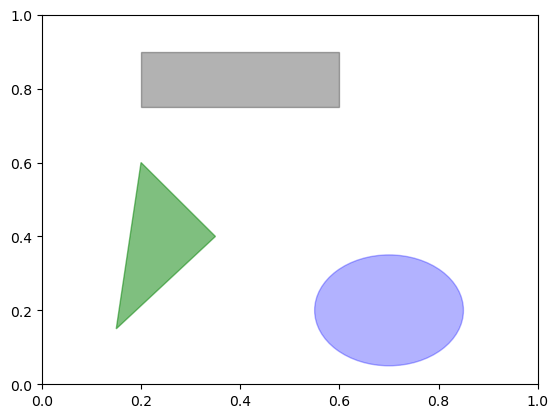

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], 
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

Se observar a implementação de muitos tipos  de plotagem familiares, verá que eles são compostos de patches.

#### Salvando plotagens em arquivos 

Podemos salvar a figura ativa em um arquivo usando 'plt.savefig'. Esse método é equivalente ao método de instância 'savefig' do objeto que representa a figura. Por exemplo, para salvar uma versão 'SVG' de uma figura, basta digitar:
    
    plt.savefig('figpath.svg')

O tipo do arquivo é inferido a partir de sua extensão. Portanto, se usou '.pdf', terá um PDF. Há duas opções importantes que uso com frequência para gráficos que serão publicados:
    
    -> dpi => Que controla a resolução em pontos por polegada;
    
    -> bbox_inches => Que pode remover espaços em branco em torno da figura. 
    
Para obter a mesma plotagem como um PNG com um mínimo de espaços em branco em torno da plotagem e com 400 DPI, poderíamos usar o seguinte:
    
    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
    
savefig não precisa escreve em disco; ele também pode escrever em qualquer objeto do tipo arquivo, como 'BytesIO':
    
    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()
    

###### Tabela 9.2 - Opções de figure.savefig

Argumento

-> fname => String contendo um path de arquivo ou um objeto Python do tipo arquivo. O formato da figura é inferido a partir da extensão do arquivo (por exemplo .pdf para PDF ou .png para PNG);

-> dpi => É a resolução da figura em pontos por polegadas; o default é 100, mas pode ser configurado.

-> facecolor, edgecolor => Cor do plano de fundo da figura, fora das subplotagens; o default é 'w' (branco).

-> format => Formato de arquivo explícito a ser usado ('png', 'pdf', 'svg', 'ps', 'eps').

-> bbox_inches => Parte da figura a ser salva; se 'tight' for especificado, tentará remover o espaço vazio em torno da figura.

#### configuração da matplotlib

A matplotlib vem configurada com esquema de cores e defaults visando principalmente à preparação das figuras para publicação. Felizmente quase todo o comportamento default pode ser personalizado por meio de um conjunto amplo de parâmetros globais que determinam o tamanho da figura, o espaçamento das subplotagens, as cores, os tamanhos das fontes, os estilos de grade e assim por diante.

Uma forma de modificar a configuração por meio de um programa Python é usar o método rc; por exemplo, para definir o tamanho default da figura globalmente como 10 x 10, poderíamos usar o seguinte:
    
    plt.rc('figure', figsize=(10, 10))
    
O primeiro argumento de 'rc' é o componente que desejamos personalizar, como 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend' ou vários outros. Depois disso, pode haver uma sequência de argumentos nomeados informando os novos parâmetros. Uma maneira fácil de escrever as opções em seu programa é na forma de um dicionário:
    
    font_options = {'family': 'monospace', 
                    'weight': 'bold',
                    'size': 'small'}
    plt.rc('font', **font_options)
    
Para uma personalização mais extensa e para ver uma lista de todas as opções, a matplotlib vem com um arquivo de configuração 'matplotlibrc' no diretório 'matplotlib/mpl-data'. Se esse arquivo for personalizado e colocado em seu diretório home chamado '.matplotlibrc', ele será carregado sempre que usar a matplotlib.

### 9.2 Plotagem com o pandas e o seaborn

A matplotlib pode ser uma ferramenta razoavelmente de baixo nível. Compomos uma plotagem a partir de seus componentes básicos: modo de exibição dos dados, o tipo da plotagem: de linha, de barra, de caixa, de dispersão, de contorno, etc.) legenda, título, rótulos para os tiques e outras anotações.
        
No pandas, podemos ter várias colunas de dados, junto com rótulos para linhas e colunas. O próprio pandas tem métodos embutidos que simplificam a criação de visualizações a partir de DataFrame e Series. Outra biblioteca é o seaborn (https://seaborn.pydata.org): uma biblioteca gráfica de estatísticas. O seaborn simplifica a criação de vários tipos comuns de visualização.

#### Plotagens de linha:
    
Tanto Series quanto DataFrame têm um atributo 'plot' para criar alguns tipos básicos de plotagem. Por padrão 'plot()' cria plotagens de linha.

<AxesSubplot:>

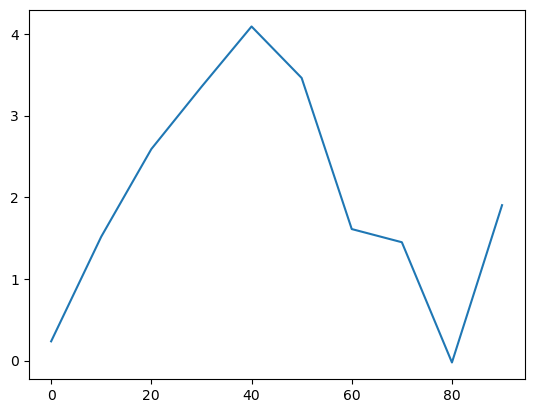

In [31]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

O índice do objeto Series é passado para a matplotlib para plotagem no eixo x, embora possa desativar isso especificando 'use_index=False'. Os tiques e os limites do eixo x podem ser ajustados com as opções 'xticks' e 'xlim', e os eixos y respectivamente com 'yticks' e 'ylim'.

A maioria dos métodos de plotagem do pandas aceita um parâmetro  'ax' opcional, que pode ser um objeto de subplotagem da matplotlib. Isso permite um posicionamento mais flexível das subplotagens em um layout de grade.

O método 'plot' de DataFrame plota cada uma de suas colunas como uma linha diferente na mesma subplotagem, criando uma legenda automaticamente:

In [32]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))


<AxesSubplot:>

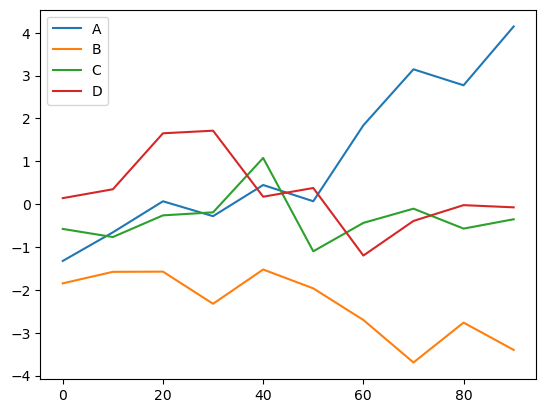

In [33]:
df.plot()

O atributo 'plot' contém uma "família" de métodos para diferentes tipos de plotagem. Por exemplo, 'df.plot()' é equivalente a df.plot.line(). Exploraremos alguns desses médodos a seguir.

###### Tabela 9.3 - Argumentos do método Series.plot

Argumento

-> label => Rótulo para a legenda da plotagem.

-> ax => Objeto de plotagem da matplotlib para a plotagem; se nada for especificado utiliza a subplotagem ativa da matplotlib.

-> style => String de estilo, por exemplo, 'ko--', a ser passada para a matplotlib.

-> alpha => A opacidade de preenchimento (de 0 a 1) da plotagem.

-> kind => Pode ser 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'.

-> logy => Uma escala logarítmica no eixo y.

-> use_index => Use o índice do objeto para rótulos dos tiques.

-> rot => Rotação dos rótulos dos tiques (de 0 a 360).

-> xticks => Valores a serem usados como os tiques no eixo x.

-> xlim => Limites no eixo x (por exemplo, [0, 10]).

-> ylim => Limites no eixo y

-> grid => Exibe grade do eixo (o default é ativo).

O DataFrame tem uma série de opções que permitem ter certa dose de flexibilidade quanto ao modo como as colunas são tratadas; por exemplo, se elas devem ser todas plotadas na mesma subplotagem ou se subplotagens diferentes devem ser criadas.

###### Tabela 9.4 - Argumentos de plotagem específicos para DataFrame

Argumento

-> subplots => Plota cada coluna do DataFrame em uma subplotagem separada.

-> sharex => Se subplots=True, compartilha o mesmo eixo x, ligando os tiques e os limites.

-> sharey => Se subplots=True, compartilha o mesmo eixo y.

-> figsize => Tamanho da figura a ser criada, na forma de uma tupla.

-> title => Título da plotagem como uma string.

-> legend => Adciona uma legenda para a subplotagem (o default é True).

-> sort_columns => Plota colunas em ordem alfabética; por padrão, utiliza a ordem presente nas colunas.

#### Plotagem de barras

'plot.bar()' e 'plot.barh()' criam plotagens de barra vertical e horizontal, respectivamente. Nesse caso, o índice de Series ou de DataFrame será usado como os tiques de 'x(bar)' ou de 'y(barh)'.

<AxesSubplot:>

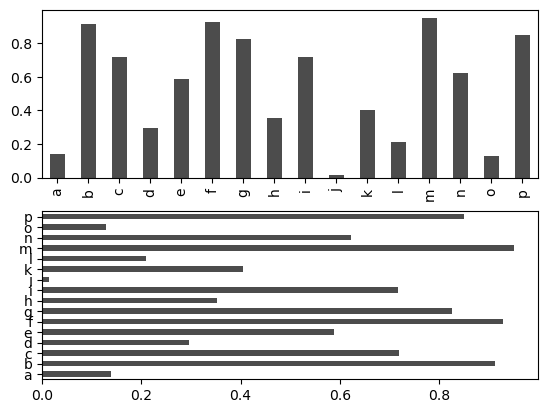

In [34]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

As opções color='k' e alpha=0.7 definem a cor das plotagens como preto e o uso de transparência parcial para o preenchimento. 

Com um DataFrame, as plotagens de barra agrupam os valores de cada linha em um grupo de barras, lado a lado, para cada valor.

In [35]:
df= pd.DataFrame(np.random.rand(6, 4), 
                 index=['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.610409,0.384419,0.710895,0.855863
two,0.638376,0.531764,0.377117,0.487589
three,0.084588,0.648248,0.094849,0.662293
four,0.286131,0.376345,0.550295,0.063375
five,0.433355,0.260805,0.242981,0.306486
six,0.446350,0.510025,0.301713,0.334419


<AxesSubplot:>

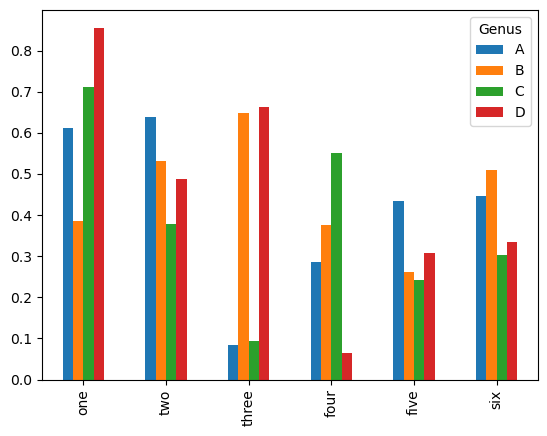

In [36]:
df.plot.bar()

###### Observe que o nome "Genus" das colunas do DataFrame é usado como título da legenda.

Criamos plotagens de barras empilhadas a partir de uma DataFrame passando 'stacked=True'; como resultado, o valor de cada linha será empilhado.

<AxesSubplot:>

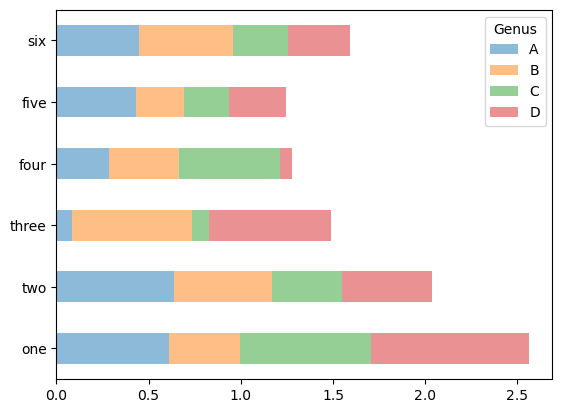

In [37]:
df.plot.barh(stacked=True, alpha=0.5)

###### NOTA: Uma receita útil para plotagens de barra consiste em visualizar a frequência de valores de uma Series usando 'value_counts' s.value_counts().plot.bar()

<AxesSubplot:>

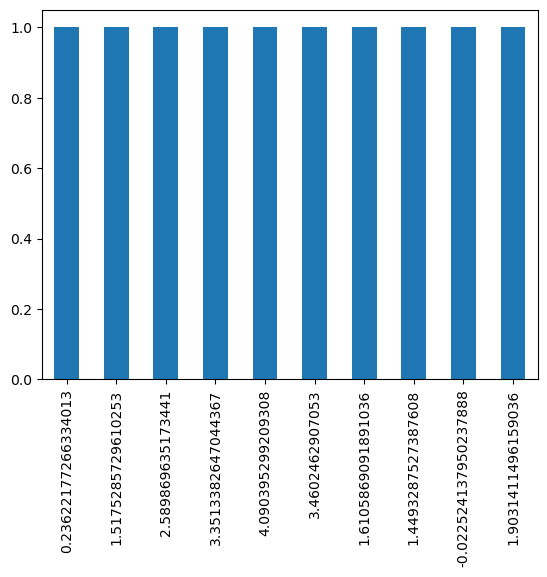

In [38]:
s.value_counts().plot.bar()

Voltando ao conjunto de dados de gorjetas usado antes no livro, suponha que quiséssemos gerar uma plotagem de barras empilhadas que exibisse o percentual de pontos de dados para cada tamanho de grupo a cada dia. Carregaremos os dados usando read_csv e faremos uma tabulação cruazada por dia e por tamanho de grupo:

In [39]:
tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


###### Não há muitos grupos de 1 e de 6 pessoas

In [40]:
part_counts = party_counts.loc[:, 2:5]

###### Então faremos uma normalização de modo que a soma de cada linha seja 1 e faremos a plotagem

In [41]:
# Normalize para que a soma seja 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


<AxesSubplot:xlabel='day'>

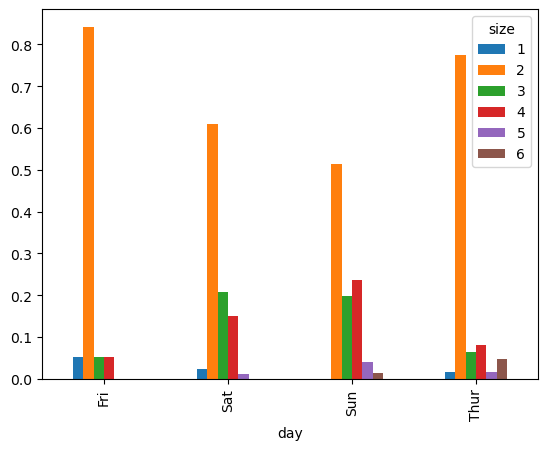

In [42]:
party_pcts.plot.bar()

Assim, podemos ver que o tamanhos dos grupos parecem aumentar no final de semana nesse conjunto de dados.

Como dados que exijam agregação ou resumo antes da criação de uma plotagem, usar o pacote 'seaborn' pode simplificar bastante. Vamos ver agora o percentual de gorjeta por dia usando o seaborn.

In [43]:
import seaborn as sns

In [44]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

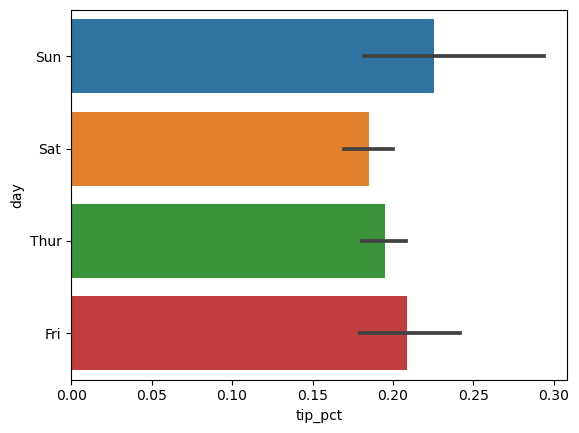

In [45]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

As funções de plotagem do seaborn aceitam um argumento 'data', que pode ser um DataFrame do pandas. Os outros argumentos referem-se aos nomes das colunas. Pelo fato de haver várias observações para cada valor em 'day', as barras são o valor médio de 'tip_pct'. As linhas pretas desenhadas nas barras representam o intervalo de confiança de 95% (isso pode ser configurado com argumentos opcionais).

'seaborn.barplot' tem uma opção 'hue' que nos permite fazer uma separação por meio de um valor adicional de categoria.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

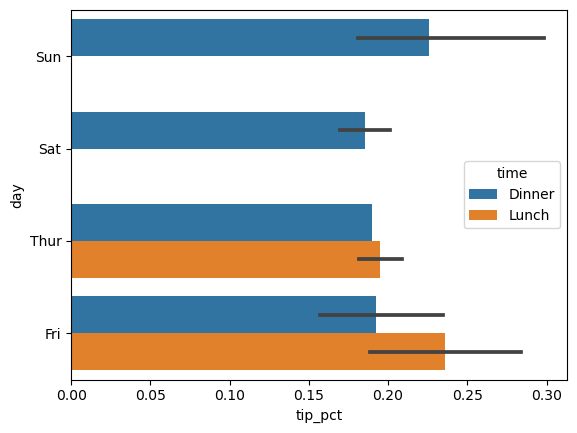

In [46]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Observe que o seaborn alterou automaticamente a estética das plotagens: a paleta de cores default, o plano de fundo da plotagem e as cores das linhas da grade.
    
Podemos alternar entre diferentes aparências para a plotagem usando 'seaborn.set'

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

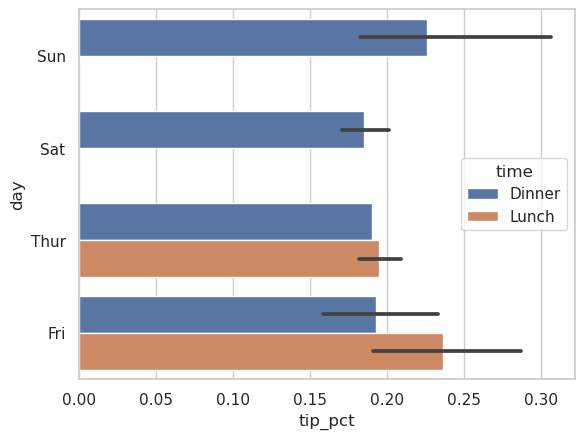

In [47]:
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### Histogramas e plotagens de densidade

Um histograma é um tipo de plotagem de barras que oferece uma exibição discreta das frequências dos valores. Os pontos de dados são separados em compartimentos (bins) discretos, uniformemente espaçados, e o número de pontos de dados em cada compartimento é plotado. Usando os dados de gorjetas, podemos gerar um histograma de porcentagens de gorjetas sobre o total das contas usando o método 'plot.hist' na Series.

<AxesSubplot:ylabel='Frequency'>

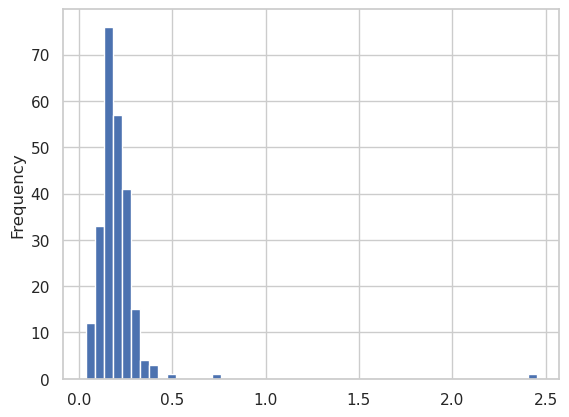

In [48]:
tips['tip_pct'].plot.hist(bins=50)

um tipo relacionado de plotagem é uma 'plotagem de densidade', formada pelo cálculo de uma estimativa de uma distribuição contínua de probabilidades que possa ser gerado os dados de observados. O procedimento usual consiste em fazer uma aproximação dessa distribuição como uma mistura de 'kernels' de distribuições mais simples, como a distribuição normal. Assim, as plotagens de densidade também são conhecidas como plotagens KDE (Kernel Density Estimate, Estimativa de Densidade Kernel).

###### O uso de 'plot.kde' gera uma plotagem de densidade que utiliza a estimativa convencional de combinação-de-normais

<AxesSubplot:ylabel='Density'>

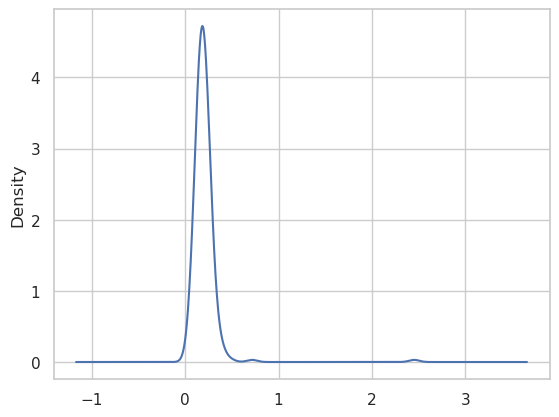

In [49]:
tips['tip_pct'].plot.density()

O seaborn gera histogramas e plotagens de densidade mais facilmente ainda com o método 'distplot', capaz de plotar tanto um histograma quanto uma estimativa de densidade contínua simultaneamente. Como exemplo, considere uma distribuição bimodal constituída de amostras de duas distribuições normais padrões distintas 

In [50]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

/home/luciano/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

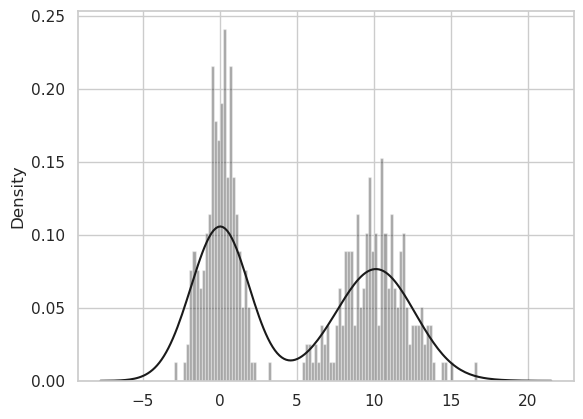

In [51]:
sns.distplot(values, bins=100, color='k')

#### Plotagens de dispersão ou de pontos

Plotagens de pontos ou de dispersão podem ser uma maneira conveniente de analisar o relacionamento entre duas séries de dados unidimensionais. Por exemplo, carregaremos a seguir o conjunto de dados 'macrodata' do projeto statsmodels, selecionaremos algumas variáveis e então calcularemos as diferenças de log:

In [52]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [53]:
trans_data = np.log(data).diff().dropna()

In [54]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


###### Podemos então usar o método 'regplot' do seaborn, que gera uma plotagem de dispersão e inclui um traço de regressão linear.

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

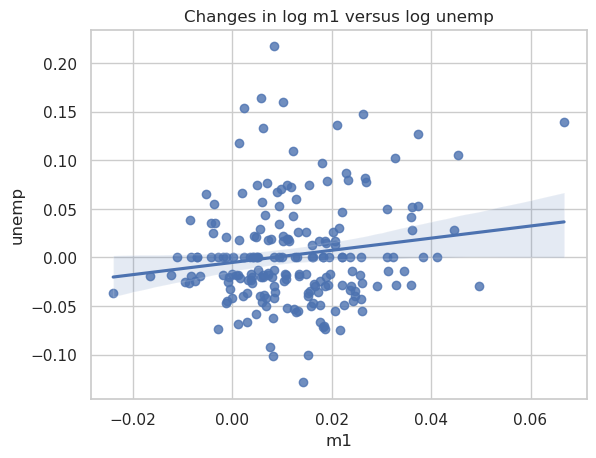

In [56]:
sns.regplot('m1', 'unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Na análise exploratória de dados, é conveniente observar todas as plotagens de dispersão entre um grupo de variáveis;  isso é conhecido como plotagem de pares ou uma matriz de plotagem de dispersão. Fazer uma plotagem como essa a partir do zero exige um pouco de trabalho; desse modo, o seaborn tem uma função 'pairplot' conveniente, que aceita colocar histogramas ou estimativas de densidade de cada variável ao longo da diagonal.

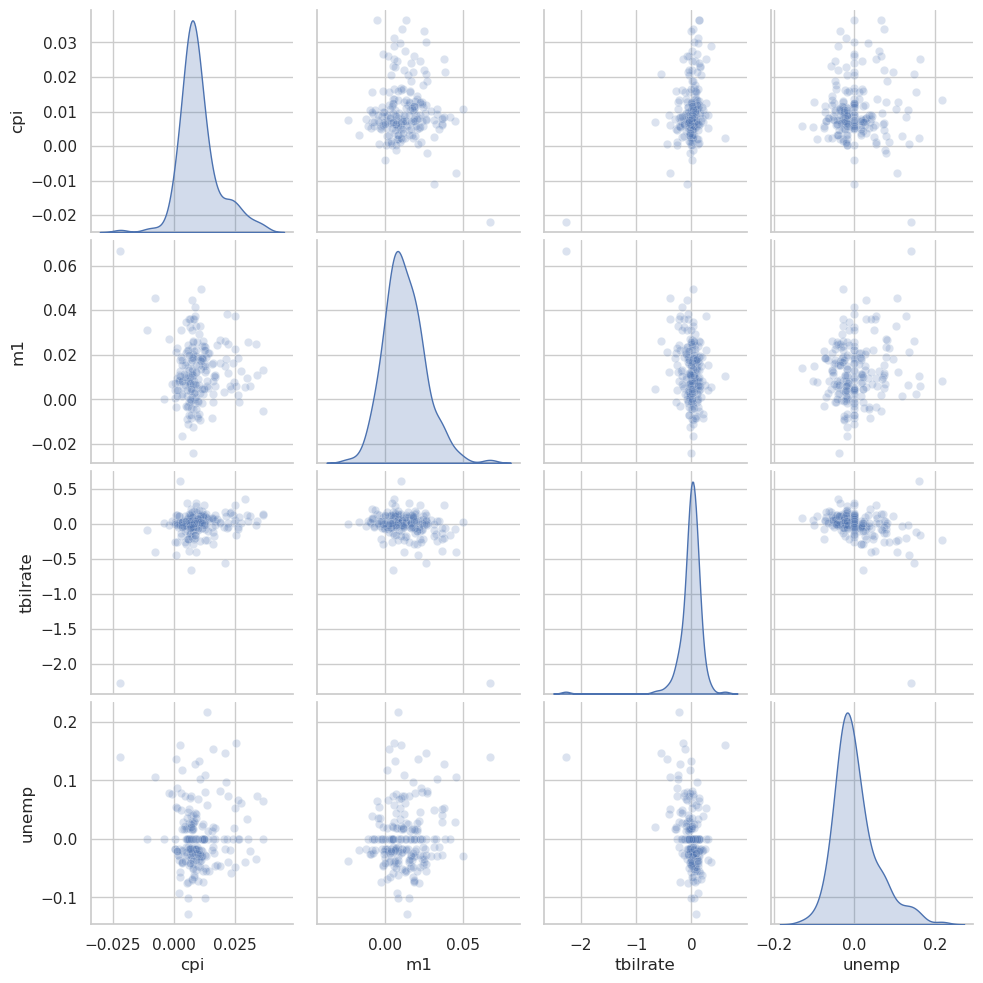

In [57]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

Talvez tenha notado o argumento 'plot_kws'. Ele permite passar opções de configuração para as chamadas de plotagem individuais nos elementos fora da diagonal

#### Grades de faceta e dados de categoria

E quanto aos conjuntos de dados para os quais temos dimensões de agrupamento adicionais? Uma forma de visualizar dados com muitas variáveis de categoria é por meio de uma grade de faceta (facet grid). O seaborn tem uma função embutida 'factorplot' conveniente que simplifica a criação de vários tipos de plotagem com facetas.

/home/luciano/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


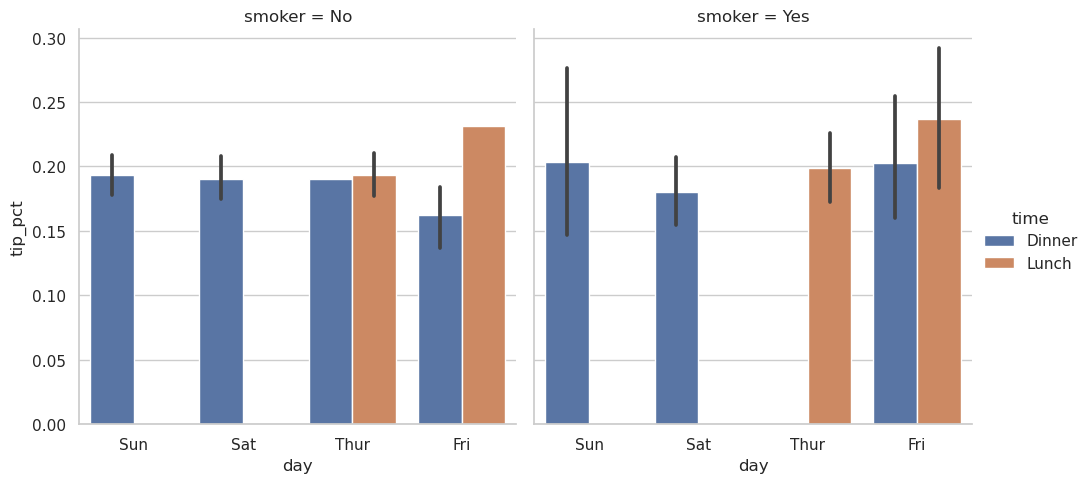

In [58]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Em vez de agrupar por 'time' por cores diferentes de barra em uma faceta, podemos também expandir a grade de facetas acrescentando uma linha por valor de time.

/home/luciano/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


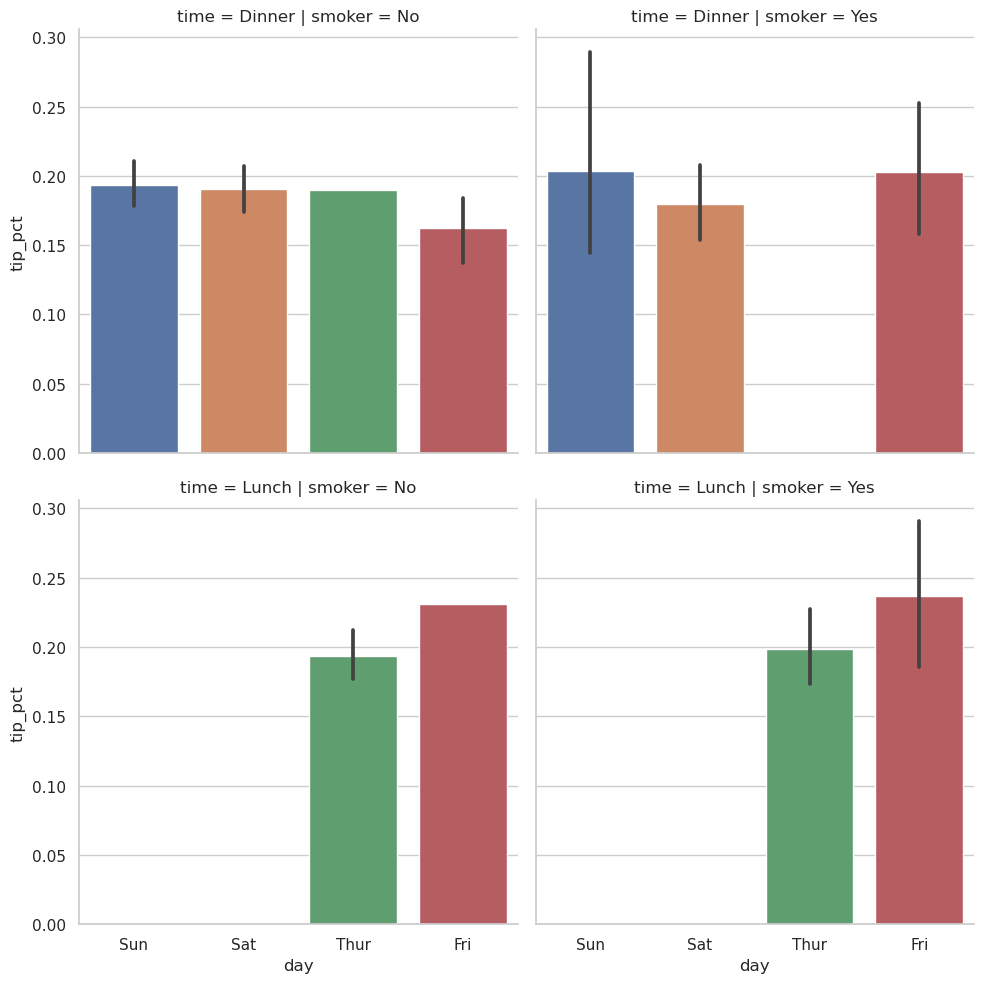

In [59]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

'factorplot' aceita outros tipos de plotagem que podem ser úteis, dependendo do que estiver tentando exibir. Por exemplo, plotagens de caixa (que mostram a mediana, os quartis, e os valores discrepantes) podem ser um tipo de visualização eficaz.

/home/luciano/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


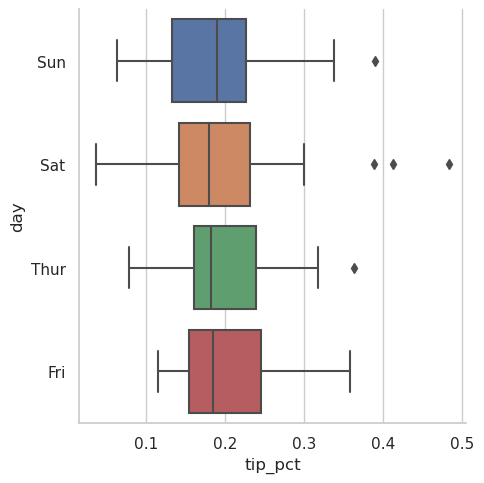

In [60]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

### 9.3 Outras ferramentas de visualização de Python

Como é comum no caso de códigos abertos, há uma variedade de opções para criar gráficos em Python. Para criar gráficos estáticos para impressão ou para web, como recomendação usar a matplotlib como default e bibliotecas add-on como o pandas e o seaborn para atender as necessidades. Para outros requisitos de visualização de dados, talvez seja conveniente conhecer uma das demais ferramentas disponíveis no mercado. 

### 9.4 Conclusão

O objetivo deste capítulo foi fazer uma apresentação inicial de algumas visualizações básicas de dados usando o pandas, a matplotlib e o seaborn. Se fazer uma comunicação visual dos resultados da análise de dados for importante em seu trabalho.